# Capstone Project - The Battle of the Neighborhoods

The purpose of this project is to define a business problem, mainly to compare among neighborhoods in city/cities, and then provide a solution by making use of Foursquare API.

## Introduction

### Project aim: Find the best location to rent an office in Hong Kong

### Business Problem

<b>Background :</b> As a business owner, I am planning to rent an office for my company. I am also a food lover, who would love to try out different varieties of cuisine around the world. With that in mind, location of my office must be surrounded with lots of high quality restaurants. In addition, other facilities like amenities, shopping mall, grocery store would add overall rating of an option. So I would like to seek help from Data Scientist to provide a detailed analysis as to where would be the best location for me to rent an office.

To define 'best location', the following criteria and weight are provided :  <br/>
1) Number of restaurants that are most 'Liked'. 40% <br/>
2) Varieties of cuisine. 30% <br/>
3) Other facilities, e.g. shopping mall, Travel/Parking places 30% <br/>


Remarks : Only restaurants that are within 500M of the office should be considered. Only Grade 1 office would be considered.

## Data Collection

To start with, several Grade 1 offices have been shortlisted for comparison, namely (Name and coordinates) : <br>
1) International Finance Centre (Hong Kong) <br/>
2) New World Tower <br/>
3) Shun Tak Centre <br/>
4) Times Square <br/>
5) Lippo Centre <br/>
6) One Island East <br/>
7) One Island South <br/>
8) Cityplaza <br/>
9) Sky 100, Tsim Sha Tsui <br/>
10) Langham Place Shopping Mall <br/>
11) King Palace Plaza, Kwun Tong <br/>
12) Peninsula Square, Hung Hom <br/>
13) Billion Centre, Kowloon Bay <br/>
14) Maxgrand Plaza, San Po Kong <br/>
15) Celebrity Commercial Centre, Sham Shui Po <br/>
16) Tuen Mun Central Square, Tuen Mun <br/>
17) Nan Fung Centre, Tsuen Wan <br/>
18) Tai Po Commercial Centre, Tai Po <br/>
19) Asia Logistics Hub-SF Centre, Tsing Yi <br/>
20) Citygate, Tung Chung <br/>
21) Glassview Commercial Building, Yuen Long <br/>

In [1]:
#retrieve coordinates using Geocoder
#!pip install geopy  # if geopy is not already installed
from geopy.geocoders import Nominatim

def coordinates_of(address:str) -> list:
    """convert address into coordinates
    """
    print(address)
    ll = None
    count = 1
    # the service will go timeout sometime, try until it return something. All addresses have been tested to be able to return value.
    while(ll is None and count < 10):
        try:
            ll = Nominatim(user_agent="hk_agent").geocode(address)
        except:
            continue
        count = count+1
    return [ll.latitude, ll.longitude]


In [2]:
import pandas as pd

OFFICES = ['International Finance Centre', 'New World Tower, Central', 'Shun Tak Centre', 'Times Square', 'Lippo Centre', 'One Island East', 'One Island South', 'Cityplaza', 'Sky 100, Tsim Sha Tsui', 'Langham Place Shopping Mall','King Palace Plaza, Kwun Tong', 'Peninsula Square, Hung Hom', 'Billion Centre, Kowloon Bay', 'Maxgrand Plaza, San Po Kong', 'Celebrity Commercial Centre, Sham Shui Po', 'Tuen Mun Central Square, Tuen Mun' , 'Nan Fung Centre, Tsuen Wan', 'Tai Po Commercial Centre, Tai Po', 'Asia Logistics Hub-SF Centre, Tsing Yi', 'Citygate, Tung Chung', 'Glassview Commercial Building, Yuen Long']

df_offices = pd.DataFrame(columns=["name", "latitude", "longitude"])
for office in OFFICES:
    ll = coordinates_of("{}, Hong Kong".format(office))
    
    df_offices = df_offices.append({
     "name":office,
     "latitude": ll[0],
     "longitude":  ll[1]
      }, ignore_index=True)


International Finance Centre, Hong Kong
New World Tower, Central, Hong Kong
Shun Tak Centre, Hong Kong
Times Square, Hong Kong
Lippo Centre, Hong Kong
One Island East, Hong Kong
One Island South, Hong Kong
Cityplaza, Hong Kong
Sky 100, Tsim Sha Tsui, Hong Kong
Langham Place Shopping Mall, Hong Kong
King Palace Plaza, Kwun Tong, Hong Kong
Peninsula Square, Hung Hom, Hong Kong
Billion Centre, Kowloon Bay, Hong Kong
Maxgrand Plaza, San Po Kong, Hong Kong
Celebrity Commercial Centre, Sham Shui Po, Hong Kong
Tuen Mun Central Square, Tuen Mun, Hong Kong
Nan Fung Centre, Tsuen Wan, Hong Kong
Tai Po Commercial Centre, Tai Po, Hong Kong
Asia Logistics Hub-SF Centre, Tsing Yi, Hong Kong
Citygate, Tung Chung, Hong Kong
Glassview Commercial Building, Yuen Long, Hong Kong


In [3]:
df_offices

,name,latitude,longitude
0,International Finance Centre,22.285418,114.158969
1,"New World Tower, Central",22.280420,114.157027
2,Shun Tak Centre,22.287939,114.151876
3,Times Square,22.278307,114.182098
4,Lippo Centre,22.279372,114.163472
5,One Island East,22.286221,114.213389
6,One Island South,22.248710,114.169263
7,Cityplaza,22.285331,114.217691
8,"Sky 100, Tsim Sha Tsui",22.297493,114.171429
9,Langham Place Shopping Mall,22.317944,114.168666


Coordinates of each selected offices have been retrieved by geopy.geocoders. <br/>
Restaurants and other facilities around will be retrieved using Foursquare API.


## Show selected area on map

In [4]:
#Retrieve coordinates of Hong Kong to set center of map
hk_ll = coordinates_of('Kowloon') #using Kowloon better utilize space of map to show more area
print('Coordinates of Hong Kong {},{}'.format(hk_ll[0], hk_ll[1]))

Kowloon
Coordinates of Hong Kong 22.3116452,114.1767885


In [5]:
!pip install folium
import folium

In [6]:

map_hk = folium.Map(location=hk_ll, zoom_start=11)

for lat, lng, label in zip(df_offices['latitude'], df_offices['longitude'], df_offices['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hk)  
    
map_hk # show the map

## Retrieve district info from Foursquare

In [7]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [8]:
CLIENT_ID = 'GZQ0BCYXPGPOKSXCVNFHB2MLAI1254WWDEVDPO0LYL0UQPPF' # Foursquare ID
CLIENT_SECRET = 'JW23AOHXH4YGPBU5LZJQEJFR32SACPZKAIFFCVFTT0RBW2YM' # Foursquare Secret
VERSION = '20200301' # Foursquare API version

In [9]:
#explore top 100 venues next to each neighborhood
radius=500
LIMIT=100
FOOD_CATEGORY_ID='4d4b7105d754a06374d81259'
#Arts & Entertainment - 4d4b7104d754a06370d81259, Travel & Transport - 4d4b7105d754a06379d81259
#Shop & Service - 4d4b7105d754a06378d81259
OTHER_CATEGORY_ID='4d4b7105d754a06377d81259,4d4b7104d754a06370d81259,4d4b7105d754a06378d81259'
#borrow functions from lab

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [58]:
#function that extracts venues from different locations
def getNearbyVenues(names, latitudes, longitudes, categoryid, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryid)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['venues']
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name'],
                v['id']) for v in results])
            
        except:
            results = {}

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue Id']
    
    return(nearby_venues)

In [21]:
venues = getNearbyVenues(df_offices['name'], df_offices['latitude'], df_offices['longitude'], FOOD_CATEGORY_ID, radius)


International Finance Centre
New World Tower, Central
Shun Tak Centre
Times Square
Lippo Centre
One Island East
One Island South
Cityplaza
Sky 100, Tsim Sha Tsui
Langham Place Shopping Mall
King Palace Plaza, Kwun Tong
Peninsula Square, Hung Hom
Billion Centre, Kowloon Bay
Maxgrand Plaza, San Po Kong
Celebrity Commercial Centre, Sham Shui Po
Tuen Mun Central Square, Tuen Mun
Nan Fung Centre, Tsuen Wan
Tai Po Commercial Centre, Tai Po
Asia Logistics Hub-SF Centre, Tsing Yi
Citygate, Tung Chung
Glassview Commercial Building, Yuen Long


In [31]:
venues.head(50)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Id,Like Count
0,International Finance Centre,22.285418,114.158969,Shake Shack,22.285522,114.158828,Burger Joint,5ae153b68ad62e00392d5a9c,67
0,International Finance Centre,22.285418,114.158969,Shake Shack,22.285522,114.158828,Burger Joint,5ae153b68ad62e00392d5a9c,67
1,International Finance Centre,22.285418,114.158969,Duck & Waffle,22.285339,114.158745,English Restaurant,5cf7d1a9ff0306002cd7ad6a,9
1,International Finance Centre,22.285418,114.158969,Duck & Waffle,22.285339,114.158745,English Restaurant,5cf7d1a9ff0306002cd7ad6a,9
2,International Finance Centre,22.285418,114.158969,Starbucks (星巴克),22.284938,114.159276,Coffee Shop,4d04c3729b7f60fc1cab09ab,96
2,International Finance Centre,22.285418,114.158969,Starbucks (星巴克),22.284938,114.159276,Coffee Shop,4d04c3729b7f60fc1cab09ab,96
3,International Finance Centre,22.285418,114.158969,Greyhound Café,22.285685,114.158927,Thai Restaurant,4e9169468b81c6df6611173d,107
4,International Finance Centre,22.285418,114.158969,Kiki Noodle Bar (Kiki麵店),22.285176,114.158604,Noodle House,5d394d7ad56d8b000734edab,3
4,International Finance Centre,22.285418,114.158969,Kiki Noodle Bar (Kiki麵店),22.285176,114.158604,Noodle House,5d394d7ad56d8b000734edab,3
5,International Finance Centre,22.285418,114.158969,Ramen House Konjiki Hototogisu (金色不如帰),22.284948,114.157910,Ramen Restaurant,5dee247e25d4310008749c9a,0


Retrieve count of 'Likes' for each venue

In [43]:

def likefor(venueIds):
    venues_count=[]
    
    for venueId in venueIds:
        count_url = "https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}".format(
            venueId,
            CLIENT_ID,
            CLIENT_SECRET, 
            VERSION) 
        venue_count = 0
        try: 
            venue_count = requests.get(count_url).json()["response"]["likes"]["count"]
            venues_count.append([venueId, venue_count])
            pd_count = pd.DataFrame(venues_count)
            pd_count.columns = ['Venue Id', 'Count']
        except:
            venue_count = 0
        
    

    return venues_count


In [26]:
venue_likes = likefor(venues['Venue Id'])


In [27]:

#Incorporate like count of each venue into venues dataframe
df_like = pd.DataFrame(venue_likes)
df_like.columns = ['Venue Id', 'Like Count']
venues = venues.join(df_like.set_index('Venue Id'), 'Venue Id')

In [34]:
venues.head(20)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Id,Like Count
0,International Finance Centre,22.285418,114.158969,Shake Shack,22.285522,114.158828,Burger Joint,5ae153b68ad62e00392d5a9c,67
1,International Finance Centre,22.285418,114.158969,Duck & Waffle,22.285339,114.158745,English Restaurant,5cf7d1a9ff0306002cd7ad6a,9
2,International Finance Centre,22.285418,114.158969,Starbucks (星巴克),22.284938,114.159276,Coffee Shop,4d04c3729b7f60fc1cab09ab,96
3,International Finance Centre,22.285418,114.158969,Greyhound Café,22.285685,114.158927,Thai Restaurant,4e9169468b81c6df6611173d,107
4,International Finance Centre,22.285418,114.158969,Kiki Noodle Bar (Kiki麵店),22.285176,114.158604,Noodle House,5d394d7ad56d8b000734edab,3
5,International Finance Centre,22.285418,114.158969,Ramen House Konjiki Hototogisu (金色不如帰),22.284948,114.157910,Ramen Restaurant,5dee247e25d4310008749c9a,0
6,International Finance Centre,22.285418,114.158969,Crystal Jade La Mian Xiao Long Bao (翡翠拉麵小籠包),22.284974,114.158251,Shanghai Restaurant,4b126a78f964a520b68923e3,159
7,International Finance Centre,22.285418,114.158969,La Rambla by Catalunya,22.285922,114.158451,Spanish Restaurant,5a1652de916bc12288cad8ce,15
8,International Finance Centre,22.285418,114.158969,% Arabica,22.286275,114.157790,Coffee Shop,5a0d44de0531e8240b3b2bea,55
9,International Finance Centre,22.285418,114.158969,Maxim's Palace (美心皇宮),22.282554,114.161525,Cantonese Restaurant,4b07a677f964a52033ff22e3,207


In [36]:
df_avg_like = pd.DataFrame(venues.groupby('Neighborhood')['Like Count'].mean())
df_avg_like.columns = ['Like Count']
df_avg_like
df_offices = df_offices.join(df_avg_like, on='name')


In [37]:
#Now we incorporate average like count of venues for each Office option
df_offices.head(20)

,name,latitude,longitude,Like Count
0,International Finance Centre,22.285418,114.158969,87.1600
1,"New World Tower, Central",22.280420,114.157027,82.6600
2,Shun Tak Centre,22.287939,114.151876,71.1200
3,Times Square,22.278307,114.182098,51.7000
4,Lippo Centre,22.279372,114.163472,55.9000
5,One Island East,22.286221,114.213389,14.4200
6,One Island South,22.248710,114.169263,2.9800
7,Cityplaza,22.285331,114.217691,12.6800
8,"Sky 100, Tsim Sha Tsui",22.297493,114.171429,43.8200
9,Langham Place Shopping Mall,22.317944,114.168666,27.9800


Now we have the like count for each venue in each option, we would like to evaluate the number of different categories in each option

In [38]:
office_varieties = pd.DataFrame(venues.groupby('Neighborhood')['Venue Category'].nunique())
office_varieties.columns = ['Cuisine Category Count']
df_offices = df_offices.join(office_varieties, on='name')
df_offices

,name,latitude,longitude,Like Count,Cuisine Category Count
0,International Finance Centre,22.285418,114.158969,87.1600,22
1,"New World Tower, Central",22.280420,114.157027,82.6600,26
2,Shun Tak Centre,22.287939,114.151876,71.1200,25
3,Times Square,22.278307,114.182098,51.7000,31
4,Lippo Centre,22.279372,114.163472,55.9000,25
5,One Island East,22.286221,114.213389,14.4200,24
6,One Island South,22.248710,114.169263,2.9800,23
7,Cityplaza,22.285331,114.217691,12.6800,25
8,"Sky 100, Tsim Sha Tsui",22.297493,114.171429,43.8200,24
9,Langham Place Shopping Mall,22.317944,114.168666,27.9800,26


In [62]:
#Now we would like to find facilities other than restaurants
facilities = getNearbyVenues(df_offices['name'], df_offices['latitude'], df_offices['longitude'], OTHER_CATEGORY_ID, radius)
#	
#getNearbyVenues(['Glassview Commercial Building, Yuen Long'], [22.444680],[114.030077], OTHER_CATEGORY_ID, radius)

            

International Finance Centre
New World Tower, Central
Shun Tak Centre
Times Square
Lippo Centre
One Island East
One Island South
Cityplaza
Sky 100, Tsim Sha Tsui
Langham Place Shopping Mall
King Palace Plaza, Kwun Tong
Peninsula Square, Hung Hom
Billion Centre, Kowloon Bay
Maxgrand Plaza, San Po Kong
Celebrity Commercial Centre, Sham Shui Po
Tuen Mun Central Square, Tuen Mun
Nan Fung Centre, Tsuen Wan
Tai Po Commercial Centre, Tai Po
Asia Logistics Hub-SF Centre, Tsing Yi
Citygate, Tung Chung
Glassview Commercial Building, Yuen Long


In [63]:
facilities

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Id
0,International Finance Centre,22.285418,114.158969,Pure Fitness,22.285137,114.159455,Gym / Fitness Center,4b3082a2f964a520f2f924e3
1,International Finance Centre,22.285418,114.158969,ifc mall (國際金融中心商場),22.284613,114.158156,Shopping Mall,4b0588def964a520b9dd22e3
2,International Finance Centre,22.285418,114.158969,Palace IFC (百老匯院線),22.285742,114.158168,Multiplex,4b0df819f964a5204e5323e3
3,International Finance Centre,22.285418,114.158969,Apple ifc mall,22.284602,114.159072,Electronics Store,4d6cdd3c1dfca35d169b3fe0
4,International Finance Centre,22.285418,114.158969,pherform,22.280430,114.156019,Gym,56ac100d498efe2034c80287
5,International Finance Centre,22.285418,114.158969,Exchange Square (交易廣場),22.283485,114.158459,Building,4b7cf1bcf964a520efa92fe3
6,International Finance Centre,22.285418,114.158969,BNP Paribas (法國巴黎銀行),22.285262,114.159303,Office,4df01e1fc65b0270f3a24b54
7,International Finance Centre,22.285418,114.158969,Manning Plus (萬寧Plus),22.284152,114.158953,Pharmacy,4d0742f87d9ba35d20387423
8,International Finance Centre,22.285418,114.158969,Oliver's the Delicatessen,22.281328,114.159240,Deli / Bodega,4b0cb951f964a5205a4123e3
9,International Finance Centre,22.285418,114.158969,Goji Studios - Central,22.284400,114.154110,Gym / Fitness Center,59ad64d781348858ce6144a6


In [64]:
office_facilities = pd.DataFrame(facilities.groupby('Neighborhood')['Venue Category'].nunique())
office_facilities.columns = ['Facility Category Count']
df_offices = df_offices.join(office_facilities, on='name')
df_offices

,name,latitude,longitude,Like Count,Cuisine Category Count,Facility Category Count
0,International Finance Centre,22.285418,114.158969,87.1600,22,25
1,"New World Tower, Central",22.280420,114.157027,82.6600,26,24
2,Shun Tak Centre,22.287939,114.151876,71.1200,25,33
3,Times Square,22.278307,114.182098,51.7000,31,22
4,Lippo Centre,22.279372,114.163472,55.9000,25,31
5,One Island East,22.286221,114.213389,14.4200,24,36
6,One Island South,22.248710,114.169263,2.9800,23,33
7,Cityplaza,22.285331,114.217691,12.6800,25,37
8,"Sky 100, Tsim Sha Tsui",22.297493,114.171429,43.8200,24,27
9,Langham Place Shopping Mall,22.317944,114.168666,27.9800,26,26


In [65]:
df_offices.describe()

,latitude,longitude,Like Count,Cuisine Category Count,Facility Category Count
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,22.320643,114.146426,21.625119,23.523810,28.476190
std,0.052629,0.076473,30.462275,6.233932,8.164674
min,22.248710,113.940134,0.000000,1.000000,1.000000
25%,22.285418,114.151876,0.000000,23.000000,26.000000
50%,22.308322,114.168666,2.980000,24.000000,30.000000
75%,22.335241,114.189794,43.820000,26.000000,33.000000
max,22.447534,114.225649,87.160000,32.000000,39.000000


### Convert values into scores for each location
I would take the max value of each column to be 100% of the corresponding weight, so for 'Facility Category Count', having 39 categories would score 40% of total score.

In [67]:
LIKE_COUNT_WEIGHT = 40
CUISINE_VARIETY_WEIGHT = 30
OTHER_VARIETY_WEIGHT = 30
df_offices['like_score'] = df_offices['Like Count'] * LIKE_COUNT_WEIGHT / df_offices['Like Count'].max()
df_offices['cuisine_score'] = df_offices['Cuisine Category Count'] * CUISINE_VARIETY_WEIGHT / df_offices['Cuisine Category Count'].max()
df_offices['facility_score'] = df_offices['Facility Category Count'] * OTHER_VARIETY_WEIGHT / df_offices['Facility Category Count'].max()
df_offices['final score'] = round(df_offices['like_score'] + df_offices['cuisine_score'] + df_offices['facility_score'], 2)
df_offices

,name,latitude,longitude,Like Count,Cuisine Category Count,Facility Category Count,like_score,cuisine_score,facility_score,final score
0,International Finance Centre,22.285418,114.158969,87.1600,22,25,40.000000,20.6250,19.230769,79.86
1,"New World Tower, Central",22.280420,114.157027,82.6600,26,24,37.934832,24.3750,18.461538,80.77
2,Shun Tak Centre,22.287939,114.151876,71.1200,25,33,32.638825,23.4375,25.384615,81.46
3,Times Square,22.278307,114.182098,51.7000,31,22,23.726480,29.0625,16.923077,69.71
4,Lippo Centre,22.279372,114.163472,55.9000,25,31,25.653970,23.4375,23.846154,72.94
5,One Island East,22.286221,114.213389,14.4200,24,36,6.617715,22.5000,27.692308,56.81
6,One Island South,22.248710,114.169263,2.9800,23,33,1.367600,21.5625,25.384615,48.31
7,Cityplaza,22.285331,114.217691,12.6800,25,37,5.819183,23.4375,28.461538,57.72
8,"Sky 100, Tsim Sha Tsui",22.297493,114.171429,43.8200,24,27,20.110142,22.5000,20.769231,63.38
9,Langham Place Shopping Mall,22.317944,114.168666,27.9800,26,26,12.840753,24.3750,20.000000,57.22


We got all information ready and we could print the office with their corresponding score on the map

In [68]:
df_offices.head(10)

,name,latitude,longitude,Like Count,Cuisine Category Count,Facility Category Count,like_score,cuisine_score,facility_score,final score
0,International Finance Centre,22.285418,114.158969,87.16,22,25,40.000000,20.6250,19.230769,79.86
1,"New World Tower, Central",22.280420,114.157027,82.66,26,24,37.934832,24.3750,18.461538,80.77
2,Shun Tak Centre,22.287939,114.151876,71.12,25,33,32.638825,23.4375,25.384615,81.46
3,Times Square,22.278307,114.182098,51.70,31,22,23.726480,29.0625,16.923077,69.71
4,Lippo Centre,22.279372,114.163472,55.90,25,31,25.653970,23.4375,23.846154,72.94
5,One Island East,22.286221,114.213389,14.42,24,36,6.617715,22.5000,27.692308,56.81
6,One Island South,22.248710,114.169263,2.98,23,33,1.367600,21.5625,25.384615,48.31
7,Cityplaza,22.285331,114.217691,12.68,25,37,5.819183,23.4375,28.461538,57.72
8,"Sky 100, Tsim Sha Tsui",22.297493,114.171429,43.82,24,27,20.110142,22.5000,20.769231,63.38
9,Langham Place Shopping Mall,22.317944,114.168666,27.98,26,26,12.840753,24.3750,20.000000,57.22


In [71]:
import branca.colormap as cm

map_hk = folium.Map(location=hk_ll, zoom_start=11)

MIN = df_offices['final score'].min()
MAX = df_offices['final score'].max()
colormap = cm.LinearColormap(colors=['yellow','blue'], vmin=MIN,vmax=MAX)

for lat, lng, label, score in zip(df_offices['latitude'], df_offices['longitude'], df_offices['name'], df_offices['final score']):

    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup="{} ({})".format(label, score),
        color=colormap(score) if score<80 else 'red',
        fill=True,
        #fill_color=(1,0,0),
        fill_opacity=0.7,
        parse_html=False).add_to(map_hk)  
    
map_hk # show the map

In [86]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.style.use('ggplot')


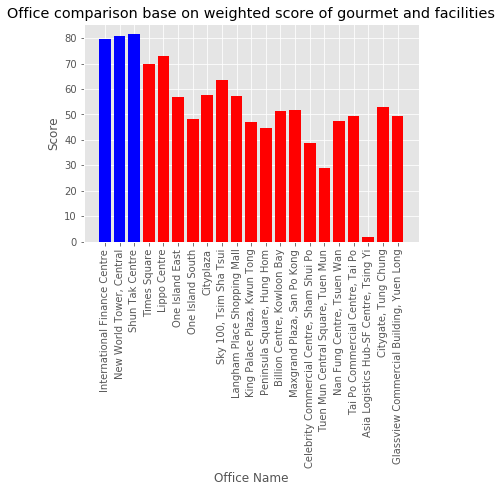

In [87]:
offices = df_offices['name']
scores = df_offices['final score']

y_pos = np.arange(len(offices))

color=['blue', 'blue', 'blue']
for i in y_pos:
    color.append('red')
plt.bar(y_pos, scores, color=color)
plt.xticks(y_pos, offices, rotation=90)

plt.xlabel('Office Name')
plt.ylabel('Score')
plt.title('Office comparison base on weighted score of gourmet and facilities')
plt.show()


## Final Suggestion
From the final result, it can be seen that the further away from Central, the lower is the score, lower score will be shown in darker color. Those with score higher than 80 are marked with Red. It is no surprise provided that Central, Admiralty and Causewaybay are the area where rental fee is among the top across the world, their overall score is higher in general.

Having said that, there are limitations to this methodology that : <br/>
1) There are only limited results returned from foursquare (50 for each location) <br/>
2) The reported value in foursquare could be greatly affected by user of foursquare. It is possible that more people in eastern district prefers to report nice spot more than those who work/live in central. <br/>
3) Hong Kong is too small an area that many facilities are packed close to each other, there may not be significant difference between districts. <br/>

The top five suggestions and their corresponding score are : 


## Improvements

1) Foursquare API limits result to return only 50 results, consider keep adjusting location attitude and longitude to return more results and filter out repeated result; <br/>
2) I only consider the first category of each venue. Some venue may have more than one category included. <br/>
3) There is no official full list of Grade A Office, that's why we need to define it at the first place. <br/>
4) Original plan was to evaluate score base on venue rating, but that was a premium API, so we use count of 'Likes' instead. <br/>
